In [20]:
import os
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from freeman.utils.support_tf import LogLevelManager as llm
llm.set(2)

In [2]:
train_ds_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv"
train_ds_fp = tf.keras.utils.get_file(
    fname=os.path.basename(train_ds_url), origin=train_ds_url)
train_ds_fp

'/home/freeman/.keras/datasets/iris_training.csv'

In [3]:
!head -n5 {train_ds_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [4]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
feature_names = column_names[:-1]
label_name = column_names[-1]
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [5]:
batch_size = 32
train_ds = tf.data.experimental.make_csv_dataset(
    train_ds_fp, batch_size=batch_size, num_epochs=1,
    column_names=column_names, label_name=label_name, 
)

In [6]:
features, labels = next(iter(train_ds))
features

OrderedDict([('sepal_length',
              <tf.Tensor: shape=(32,), dtype=float32, numpy=
              array([6.3, 7.7, 6.9, 5.8, 7. , 4.9, 5. , 5.1, 4.6, 5.4, 5.5, 5.1, 5. ,
                     4.8, 4.6, 6.1, 4.8, 7.6, 6. , 6.3, 6.1, 7.9, 6.3, 4.9, 6.6, 6.7,
                     5.1, 6.6, 5.8, 6.2, 6.9, 5.1], dtype=float32)>),
             ('sepal_width',
              <tf.Tensor: shape=(32,), dtype=float32, numpy=
              array([2.5, 2.6, 3.1, 2.8, 3.2, 3.1, 3.4, 2.5, 3.6, 3.9, 2.6, 3.8, 2. ,
                     3.1, 3.2, 2.8, 3.4, 3. , 2.7, 3.3, 3. , 3.8, 2.3, 3.1, 3. , 3. ,
                     3.5, 2.9, 2.6, 2.8, 3.2, 3.7], dtype=float32)>),
             ('petal_length',
              <tf.Tensor: shape=(32,), dtype=float32, numpy=
              array([5. , 6.9, 4.9, 5.1, 4.7, 1.5, 1.5, 3. , 1. , 1.7, 4.4, 1.9, 3.5,
                     1.6, 1.4, 4.7, 1.6, 6.6, 5.1, 4.7, 4.9, 6.4, 4.4, 1.5, 4.4, 5. ,
                     1.4, 4.6, 4. , 4.8, 5.7, 1.5], dtype=float32)>),
  

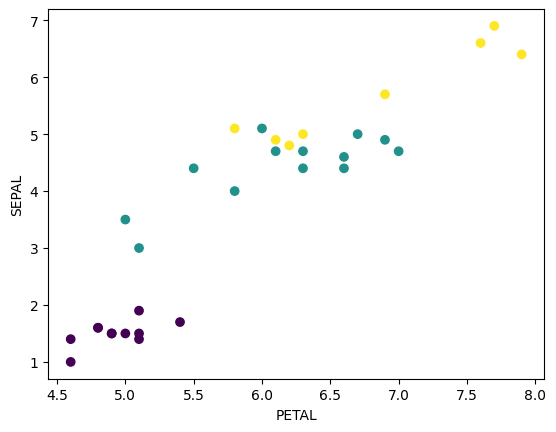

In [10]:
plt.scatter(features['sepal_length'], features['petal_length'], c=labels, cmap="viridis")
plt.xlabel("PETAL")
plt.ylabel("SEPAL")
plt.show()

In [21]:
train_df = pd.read_csv(train_ds_fp, sep=",", skiprows=[0], names=column_names)

In [22]:
train_df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  120 non-null    float64
 1   sepal_width   120 non-null    float64
 2   petal_length  120 non-null    float64
 3   petal_width   120 non-null    float64
 4   species       120 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.8 KB


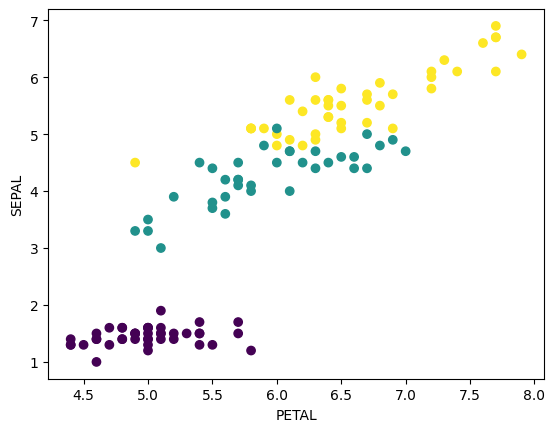

In [27]:
plt.scatter(train_df['sepal_length'], train_df['petal_length'], c=train_df["species"], cmap="viridis")
plt.xlabel("PETAL")
plt.ylabel("SEPAL")
plt.show()